Here we do bla bla

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
with open(r"./data/spotify_songs.csv", 'r', encoding="utf8") as f:
    df = pd.read_csv(f)

In [7]:
selected_attributes = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence']

selected_df = df[selected_attributes]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(standardized_data)

# Get the loadings of PC1 and PC2
loadings = pca.components_[:2, :]

# Get the attribute names
attribute_names = selected_df.columns

# Sort attributes based on loadings
pc1_sorted_attributes = [attribute_names[i] for i in (-loadings[0]).argsort()]
pc2_sorted_attributes = [attribute_names[i] for i in (-loadings[1]).argsort()]

# Print the first attribute of PC1 and PC2
print("Attribute 1 primarily represented by PC1:", pc1_sorted_attributes[0])
print("Attribute 1 primarily represented by PC2:", pc2_sorted_attributes[0])
print("Attribute 2 primarily represented by PC1:", pc1_sorted_attributes[1])
print("Attribute 2 primarily represented by PC2:", pc2_sorted_attributes[1])
print("Attribute 3 primarily represented by PC1:", pc1_sorted_attributes[2])
print("Attribute 3 primarily represented by PC2:", pc2_sorted_attributes[2])

Attribute 1 primarily represented by PC1: acousticness
Attribute 1 primarily represented by PC2: instrumentalness
Attribute 2 primarily represented by PC1: instrumentalness
Attribute 2 primarily represented by PC2: liveness
Attribute 3 primarily represented by PC1: danceability
Attribute 3 primarily represented by PC2: energy


In [8]:
split_percentage = 0.7
split_index = int(len(df) * split_percentage)

df_train = df.iloc[:split_index]

dtc_attr = ['acousticness','instrumentalness','liveness','danceability','energy']
X_dtc_attr = df_train[dtc_attr]
y_dtc_attr = df_train['mode'].ravel()

feature_names_list = X_dtc_attr.columns.tolist()

dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=450)
dtc.fit(X_dtc_attr, y_dtc_attr)

# Assuming you have a testing set df_test
df_test = df.iloc[split_index:]

X_test = df_test[dtc_attr]
y_test = df_test['mode'].ravel()

# Use the trained decision tree model to predict on the test set
y_pred = dtc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy*100}")

Decision Tree Accuracy: 52.95431472081218


In [9]:
isof_attr = ['acousticness','instrumentalness','liveness','danceability','energy']
X_isof_attr = df_train[isof_attr]
y_isof_attr = df_train['mode'].ravel()

feature_names_list = X_isof_attr.columns.tolist()

# Create and fit the Isolation Forest model
isof = IsolationForest(contamination=0.05)  # You can adjust the contamination parameter as needed
isof.fit(X_isof_attr)

# Assuming you have a testing set df_test
df_test = df.iloc[split_index:]

X_test = df_test[isof_attr]
y_test = df_test['mode'].ravel()

# Use the trained Isolation Forest model to predict on the test set
y_pred = isof.predict(X_test)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Isolation Forest Accuracy: {accuracy * 100}")

Isolation Forest Accuracy: 50.35532994923858


C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\envs\myEnvironment\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w


Confusion Matrix:
              Predicted Major  Predicted Minor
Actual Major             3743             1341
Actual Minor             3293             1473


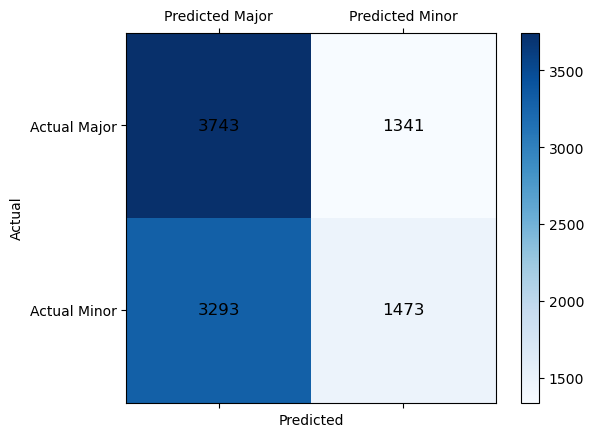

In [12]:
df_test = df.iloc[split_index:]

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for index, row in df_test.iterrows():
    
    X_sample = row[dtc_attr].values.reshape(1,-1)
    predicted_mode = dtc.predict(X_sample)[0]

    actual_mode = row['mode']
    if actual_mode == 1 and predicted_mode == 1:
        true_positive += 1
    elif actual_mode == 0 and predicted_mode == 0:
        true_negative += 1
    elif actual_mode == 1 and predicted_mode == 0:
        false_negative += 1
    elif actual_mode == 0 and predicted_mode == 1:
        false_positive += 1

# Create and print confusion matrix
conf_matrix = pd.DataFrame([[true_positive, false_negative], [false_positive, true_negative]],
                            index=['Actual Major', 'Actual Minor'],
                            columns=['Predicted Major', 'Predicted Minor'])
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap='Blues')
plt.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], conf_matrix.columns)
plt.yticks([0, 1], conf_matrix.index)
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix.iloc[i, j]), ha='center', va='center', color='black', fontsize=12)
plt.show()

In [13]:
rf_attr = ['acousticness','instrumentalness','liveness','danceability','energy']
X_rf_attr = df_train[rf_attr]
y_rf_attr = df_train['mode'].ravel()

feature_names_list = X_rf_attr.columns.tolist()

# Create and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, random_state=42)
rf.fit(X_rf_attr, y_rf_attr)

# Assuming you have a testing set df_test
df_test = df.iloc[split_index:]

X_test = df_test[rf_attr]
y_test = df_test['mode'].ravel()

# Use the trained Random Forest model to predict on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100}")

Random Forest Accuracy: 58.23350253807107


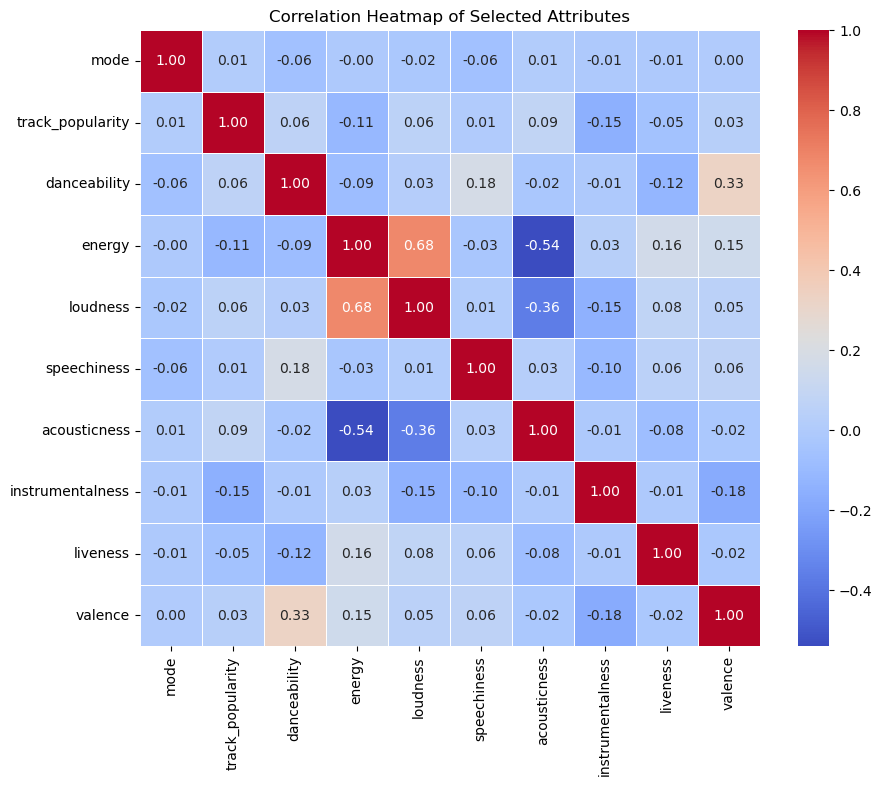

In [14]:
# Select the attributes
attributes = ['mode', 'track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Subset the DataFrame with selected attributes and drop rows with missing values
selected_df = df[attributes].dropna()

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Selected Attributes')
plt.show()

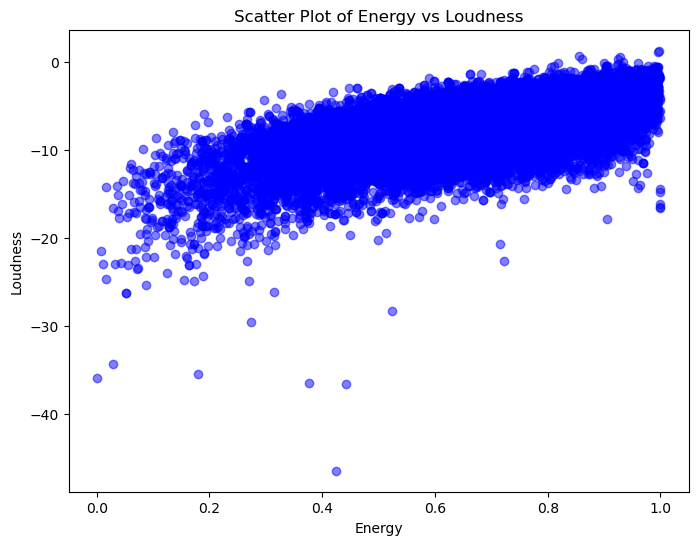

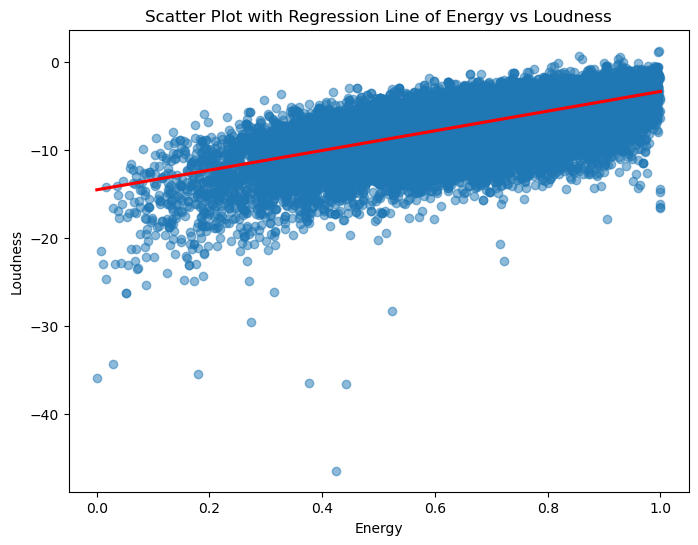

In [66]:
# Scatter plot of 'energy' vs 'loudness'
plt.figure(figsize=(8, 6))
plt.scatter(selected_df['energy'], selected_df['loudness'], alpha=0.5, color='blue')

# Add labels and title
plt.title('Scatter Plot of Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')

# Show the plot
plt.show()


# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='energy', y='loudness', data=selected_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.title('Scatter Plot with Regression Line of Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')

# Show the plot
plt.show()



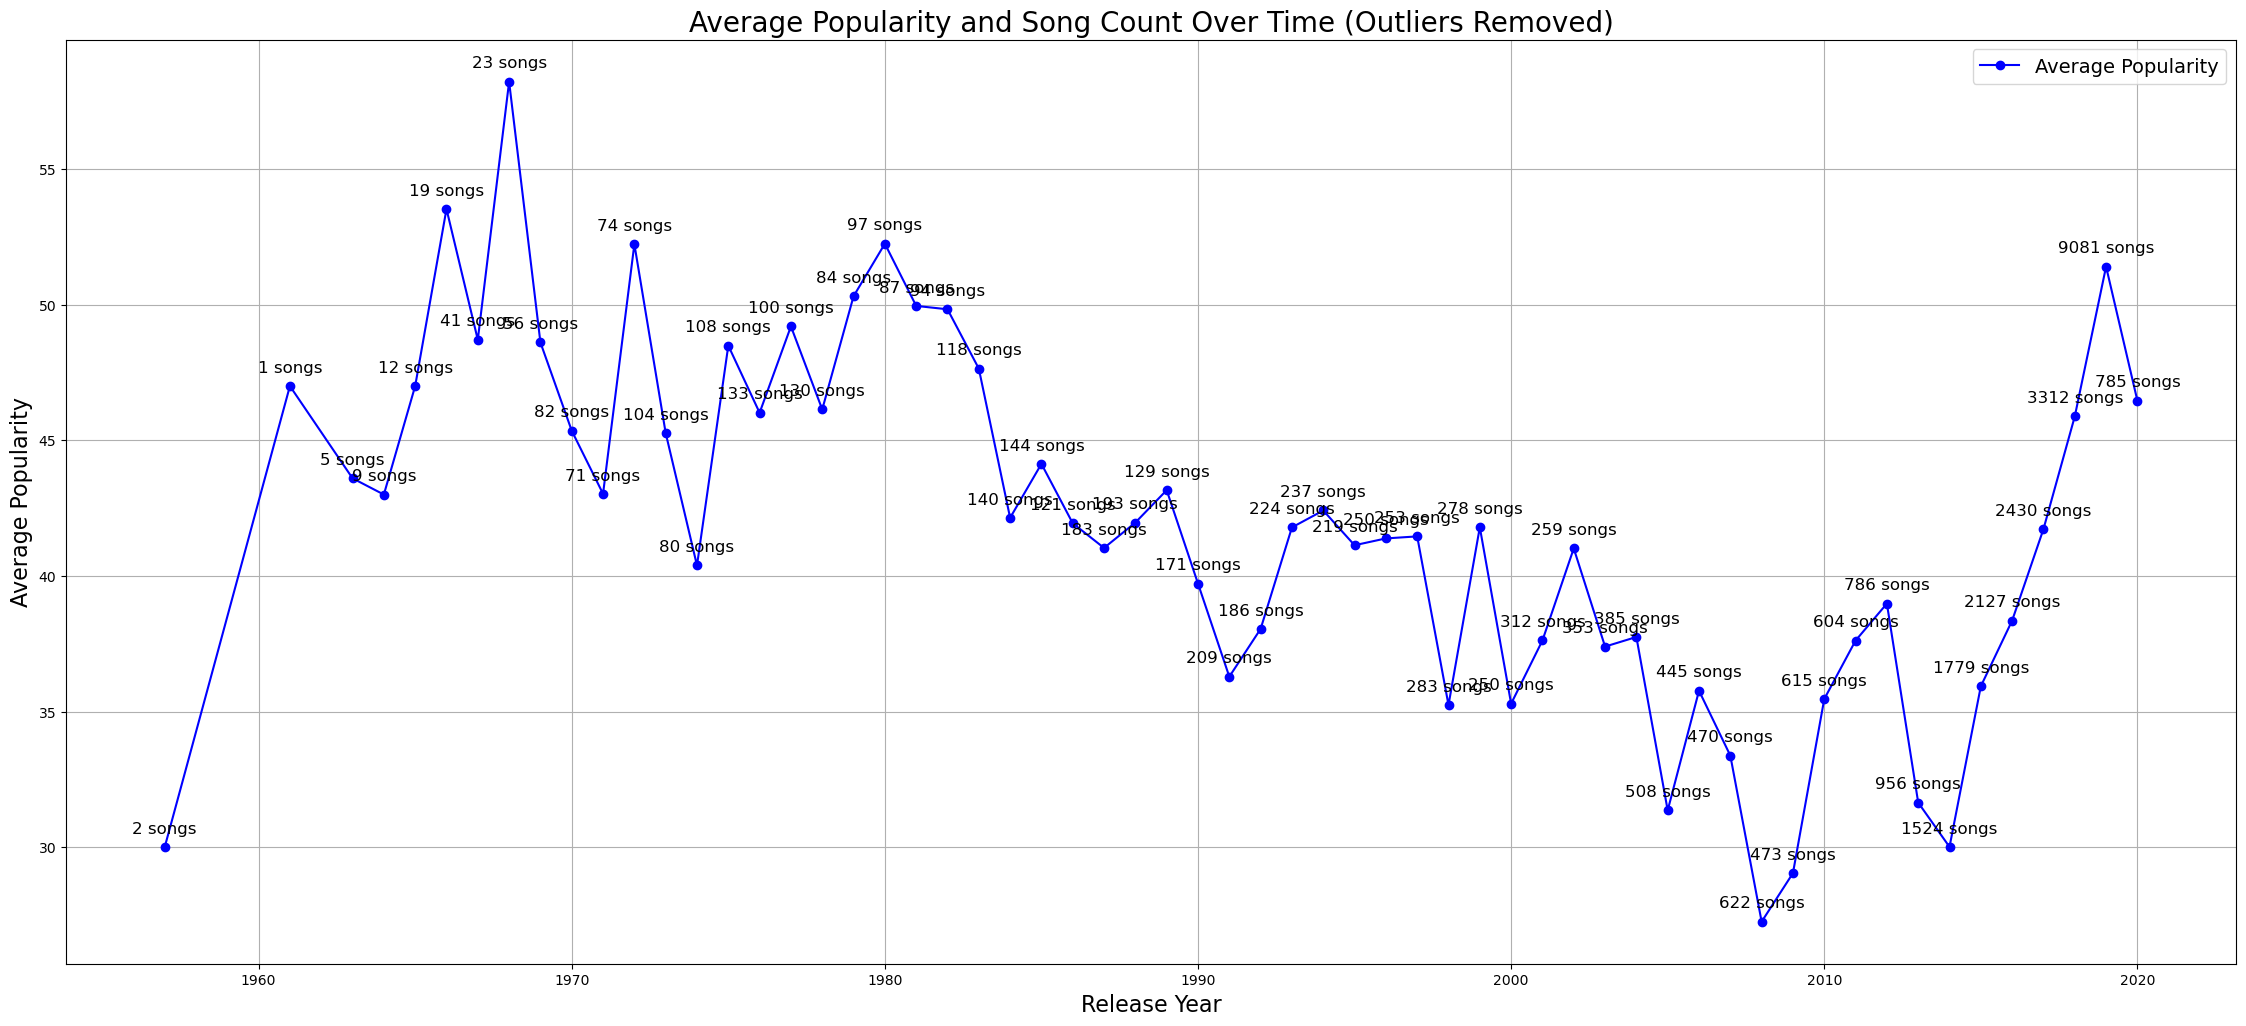

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'track_album_release_date' is in string format
df['release_year'] = df['track_album_release_date'].str.extract('(\d{4})', expand=False)

# Convert 'release_year' to numeric (if needed)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Group by release year and calculate the average popularity and count
popularity_by_year = df.groupby('release_year')['track_popularity'].agg(['mean', 'count'])

# Remove outliers based on popularity using IQR
Q1 = popularity_by_year['mean'].quantile(0.25)
Q3 = popularity_by_year['mean'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = popularity_by_year[(popularity_by_year['mean'] >= Q1 - 1.5 * IQR) & (popularity_by_year['mean'] <= Q3 + 1.5 * IQR)]

# Create a line plot
plt.figure(figsize=(28, 12))
plt.plot(filtered_data.index, filtered_data['mean'], marker='o', linestyle='-', color='b', label='Average Popularity')

# Annotate each point with the count
for year, mean_popularity, song_count in zip(filtered_data.index, filtered_data['mean'], filtered_data['count']):
    plt.annotate(f'{song_count} songs', (year, mean_popularity), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)

# Adjust text size for labels
plt.title('Average Popularity and Song Count Over Time (Outliers Removed)', fontsize=20)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Average Popularity', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


#---------------------------------------------------------------------
#-----------OLD PLOT WHERE NOT TAKING OUTLIERS INTO CONSIDERATION-----

# Assuming 'track_album_release_date' is in string format
#df['release_year'] = df['track_album_release_date'].str.extract('(\d{4})', expand=False)

# Convert 'release_year' to numeric (if needed)
#df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Group by release year and calculate the average popularity and count
#popularity_by_year = df.groupby('release_year')['track_popularity'].agg(['mean', 'count'])

# Create a line plot
#plt.figure(figsize=(28, 12))
#plt.plot(popularity_by_year.index, popularity_by_year['mean'], marker='o', linestyle='-', color='b', label='Average Popularity')

# Annotate each point with the count
#for year, mean_popularity, song_count in zip(popularity_by_year.index, popularity_by_year['mean'], popularity_by_year['count']):
#    plt.annotate(f'{song_count} songs', (year, mean_popularity), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)

# Adjust text size for labels
#plt.title('Average Popularity and Song Count Over Time', fontsize=20)
#plt.xlabel('Release Year', fontsize=16)
#plt.ylabel('Average Popularity', fontsize=16)
#plt.legend(fontsize=14)
#plt.grid(True)
#plt.show()


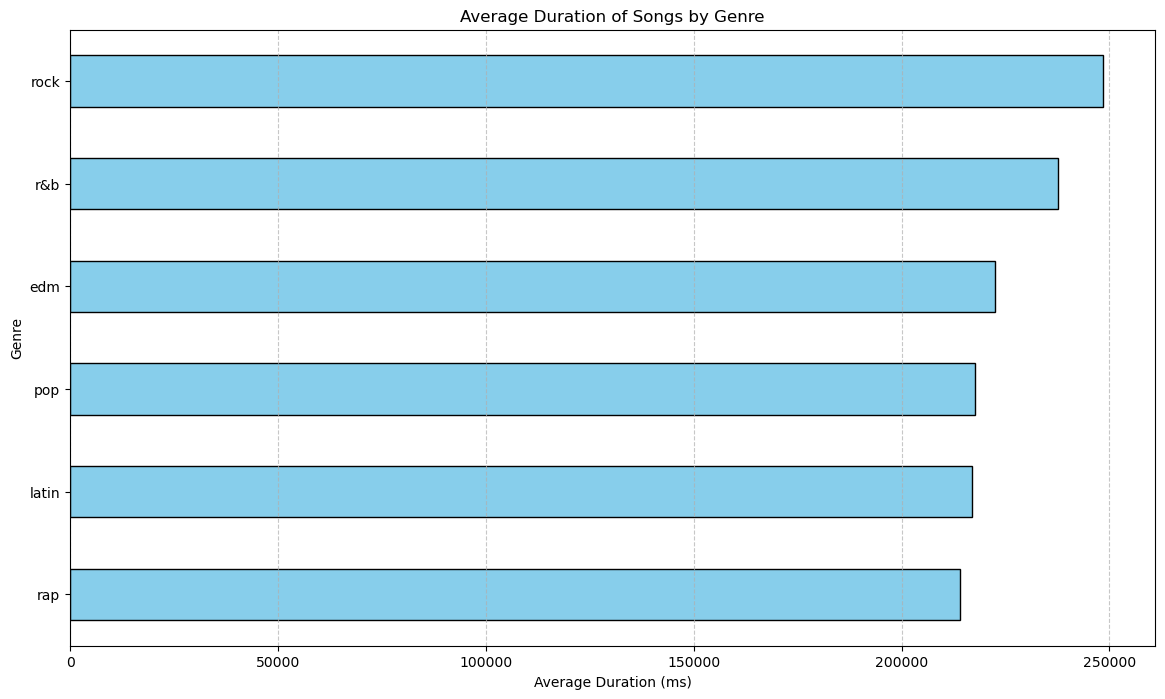

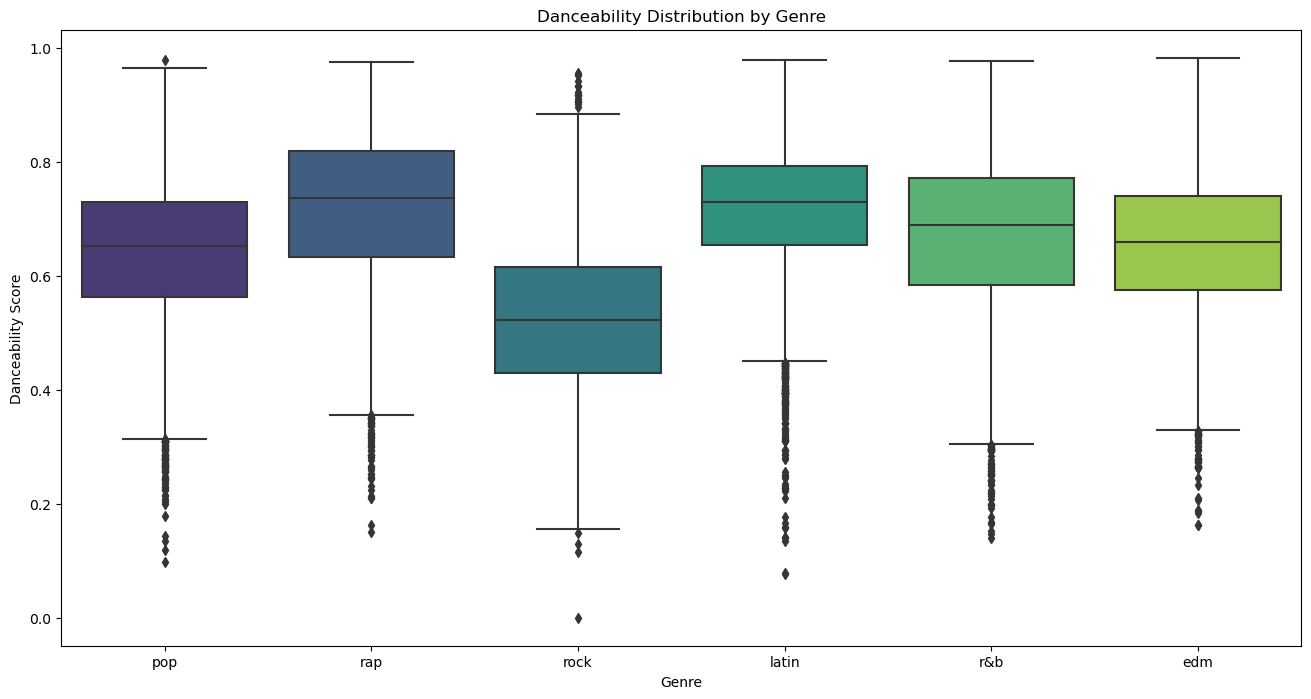

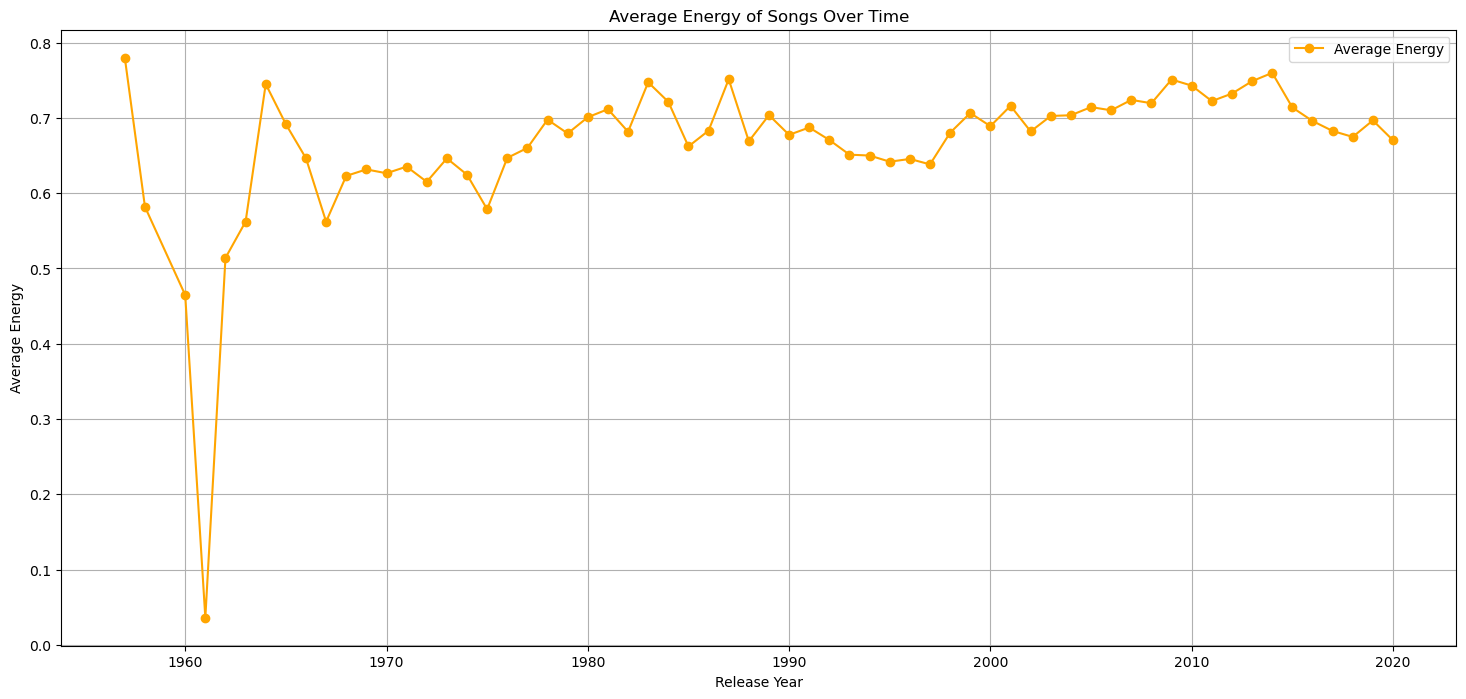

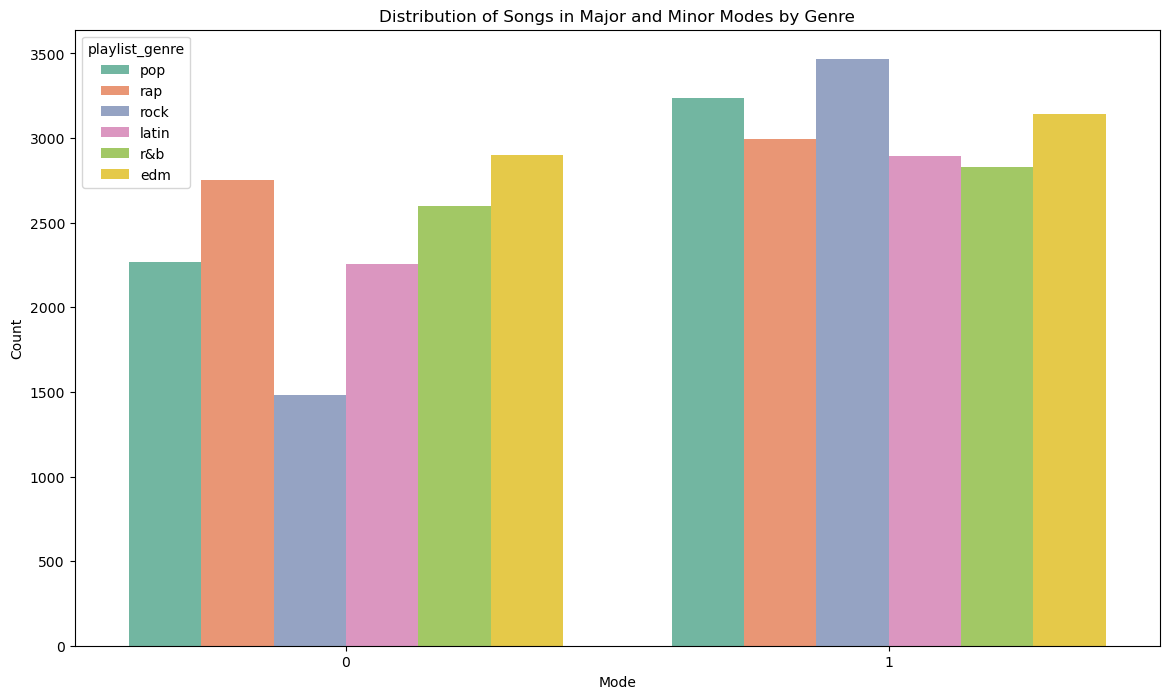

In [90]:
# Group by genre and calculate the average duration
duration_by_genre = df.groupby('playlist_genre')['duration_ms'].mean()

# Create a bar plot
plt.figure(figsize=(14, 8))
duration_by_genre.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Duration of Songs by Genre')
plt.xlabel('Average Duration (ms)')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#--------------------------------
# Create a boxplot of danceability scores by genre
plt.figure(figsize=(16, 8))
sns.boxplot(x='playlist_genre', y='danceability', data=df, palette='viridis')
plt.title('Danceability Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Danceability Score')
plt.show()

#--------------------------------------
# Group by release year and calculate the average energy
energy_by_year = df.groupby('release_year')['energy'].mean()

# Create a line plot for energy trends
plt.figure(figsize=(18, 8))
plt.plot(energy_by_year.index, energy_by_year, marker='o', linestyle='-', color='orange', label='Average Energy')
plt.title('Average Energy of Songs Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Energy')
plt.legend()
plt.grid(True)
plt.show()

#------------------------------------------------------
# Create a countplot of modes by genre
plt.figure(figsize=(14, 8))
sns.countplot(x='mode', hue='playlist_genre', data=df, palette='Set2')
plt.title('Distribution of Songs in Major and Minor Modes by Genre')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()




In [82]:
from sklearn.metrics.pairwise import paired_distances
from scipy.stats import pearsonr

# List of attributes to remove
attributes_to_remove = ['playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']

# Remove specified columns
df_reduced = df.drop(columns=attributes_to_remove)

# Remove duplicate rows
df_no_duplicates = df_reduced.drop_duplicates()

# Select a sample track for recommendation (replace 'Sample Track Name' with the actual track name)
sample_track_name = 'All Over You'
sample_track = df_no_duplicates[df_no_duplicates['track_name'] == sample_track_name].loc[:, selected_attributes]

# Select all other tracks for comparison
comparison_tracks = df_no_duplicates[df_no_duplicates['track_name'] != sample_track_name].loc[:, selected_attributes]

# Calculate Pearson correlation coefficient
similarities = []
for index, row in comparison_tracks.iterrows():
    corr, _ = pearsonr(sample_track.values.flatten(), row[selected_attributes].values.flatten())
    similarities.append(corr)

# Create a new DataFrame with track information and similarity scores
similar_tracks_df = df_no_duplicates[df_no_duplicates['track_name'] != sample_track_name].copy()
similar_tracks_df['similarity_score'] = similarities

# Sort the DataFrame based on similarity scores in descending order
similar_tracks_df = similar_tracks_df.sort_values(by='similarity_score', ascending=False)

# Display the top similar tracks (you can adjust the number as needed)
top_similar_tracks = similar_tracks_df.head(5)

# Display the top similar tracks with specific columns
top_similar_tracks_subset = top_similar_tracks[['track_name', 'track_artist', 'track_popularity', 'similarity_score']]
print(top_similar_tracks_subset)

               track_name   track_artist  track_popularity  similarity_score
5241      Know You Better        LEISURE                 2          0.999985
4613                Naked   Elin Bergman                34          0.999974
17191  Here Comes the Sun          Mauve                52          0.999965
22388      All In My Head     Tori Kelly                60          0.999960
5089            Mr. Angel  Tommy Newport                 0          0.999960


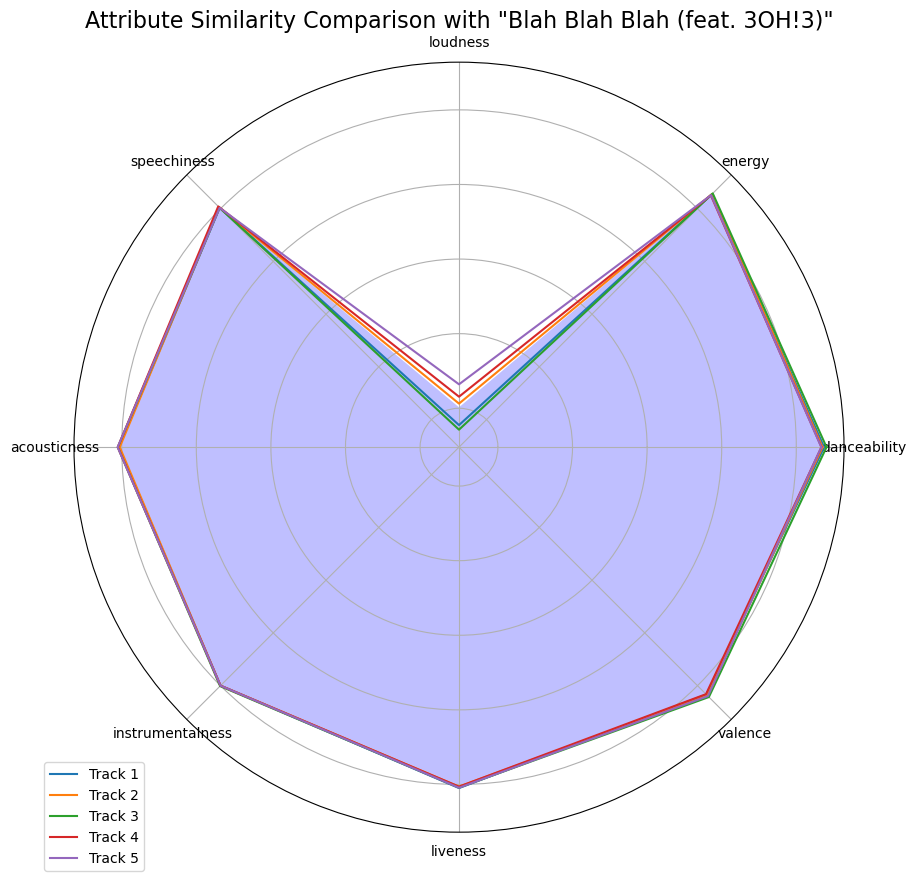

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Define attributes for comparison
attributes = ['danceability', 'energy', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence']

# Extract data for the reference track
reference_data = sample_track[attributes].values.flatten()

# Extract data for the top similar tracks
similar_tracks_data = similar_tracks_df.head(5)[attributes].values

# Calculate the number of attributes
num_attributes = len(attributes)

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False)

# Ensure that the plot is circular
reference_data = np.concatenate((reference_data, reference_data[:1]))
similar_tracks_data = np.concatenate((similar_tracks_data, similar_tracks_data[:, 0:1]), axis=1)
angles = np.concatenate((angles, angles[:1]))

# Plot radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, reference_data, 'b', alpha=0.25)

# Plot lines for each similar track
for i in range(5):
    ax.plot(angles, similar_tracks_data[i], label=f'Track {i+1}')

# Add labels
ax.set_yticklabels([])
ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes)
plt.title('Attribute Similarity Comparison with "Blah Blah Blah (feat. 3OH!3)"', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


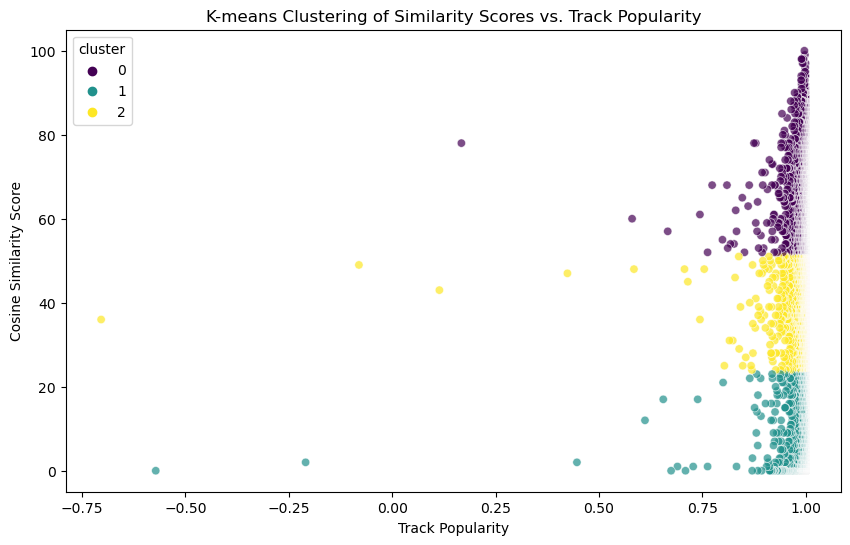

In [84]:
from sklearn.cluster import KMeans
import seaborn as sns

# Features for clustering (popularity scores)
popularity_features = similar_tracks_df[['track_popularity', 'similarity_score']]

# Number of clusters (you can adjust this based on your preference)
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
similar_tracks_df['cluster'] = kmeans.fit_predict(popularity_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='similarity_score', y='track_popularity', hue='cluster', data=similar_tracks_df, palette='viridis', alpha=0.7)
plt.xlabel('Track Popularity')
plt.ylabel('Cosine Similarity Score')
plt.title('K-means Clustering of Similarity Scores vs. Track Popularity')

plt.show()


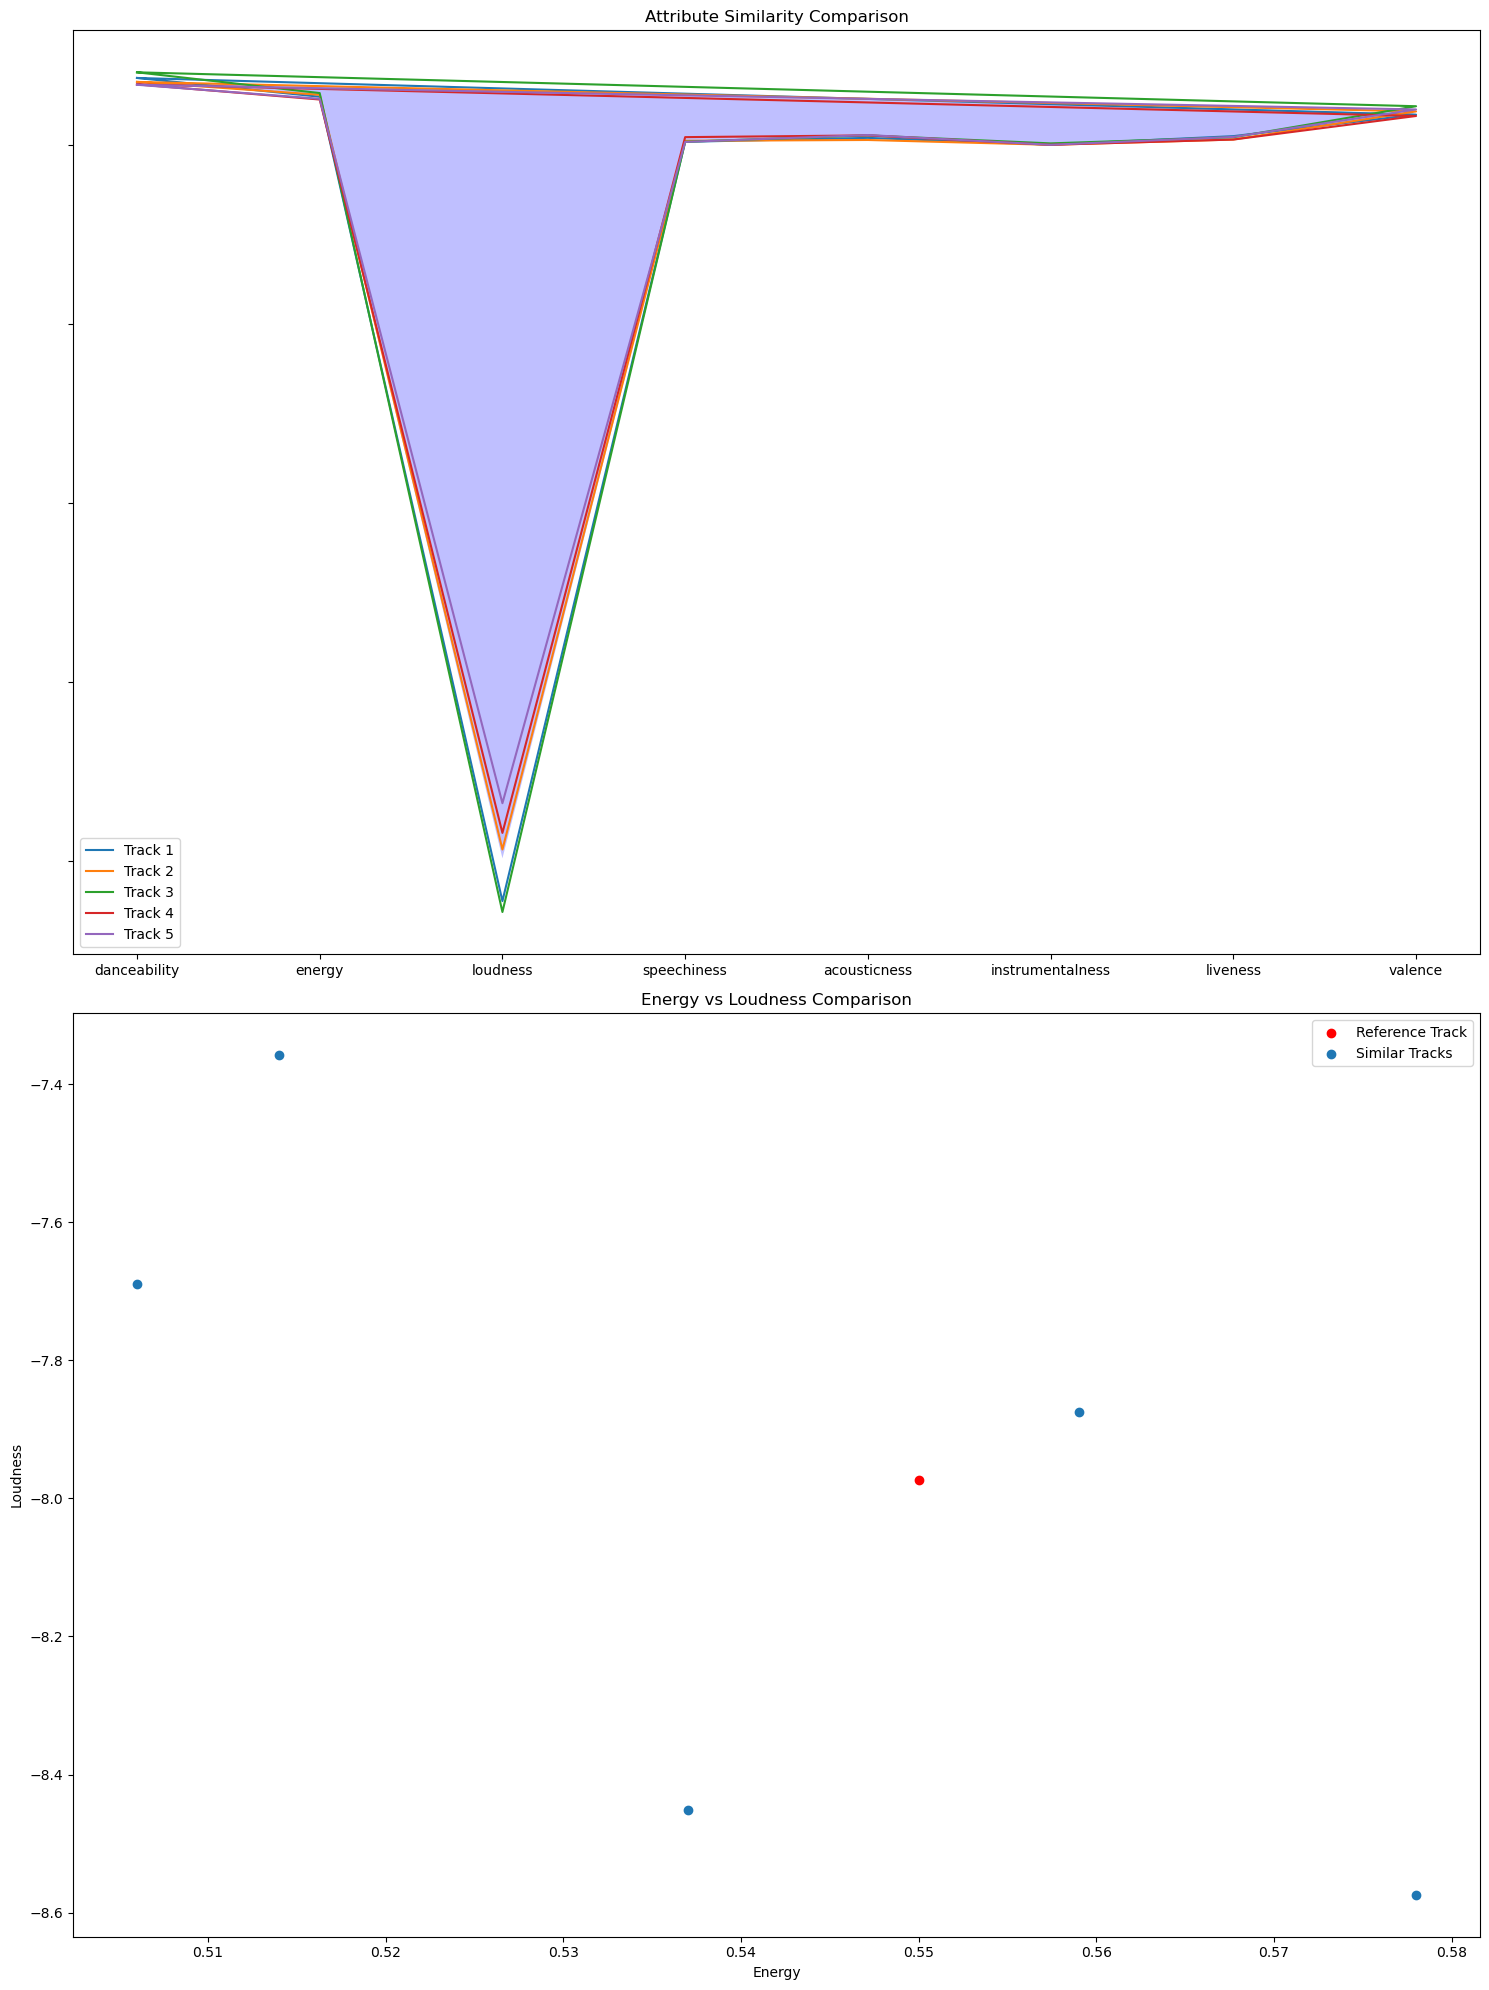

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 'top_similar_tracks_subset' as a DataFrame with the necessary attributes

# Define attributes for comparison
attributes = ['danceability', 'energy', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence']

# Extract data for the reference track
reference_data = sample_track[attributes].values.flatten()

# Extract data for the top similar tracks
similar_tracks_data = top_similar_tracks[attributes].values

# Calculate the number of attributes
num_attributes = len(attributes)

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False)

# Ensure that the plot is circular
reference_data = np.concatenate((reference_data, reference_data[:1]))
similar_tracks_data = np.concatenate((similar_tracks_data, similar_tracks_data[:, 0:1]), axis=1)
angles = np.concatenate((angles, angles[:1]))

# Plot radar chart
fig, axs = plt.subplots(2, 1, figsize=(15, 20))

# Subplot 1: Radar chart for attribute similarity
ax0 = axs[0]
ax0.fill(angles, reference_data, 'b', alpha=0.25)

# Plot lines for each similar track
for i in range(len(top_similar_tracks_subset)):
    ax0.plot(angles, similar_tracks_data[i], label=f'Track {i+1}')

# Add labels
ax0.set_yticklabels([])
ax0.set_xticks(angles[:-1])
ax0.set_xticklabels(attributes)
ax0.set_title('Attribute Similarity Comparison')
ax0.legend()

# Subplot 2: Scatter plot for energy vs loudness
ax1 = axs[1]
ax1.scatter(sample_track['energy'], sample_track['loudness'], color='red', label='Reference Track')
ax1.scatter(top_similar_tracks['energy'], top_similar_tracks['loudness'], label='Similar Tracks')

# Add labels
ax1.set_xlabel('Energy')
ax1.set_ylabel('Loudness')
ax1.set_title('Energy vs Loudness Comparison')
ax1.legend()

# Adjust layout
plt.tight_layout()

plt.show()
